In [1]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [2]:
gnb = GaussianNB()

In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [4]:
X, Y = make_classification(n_samples=200,n_features=2,n_informative=2,n_redundant=0,random_state=4)

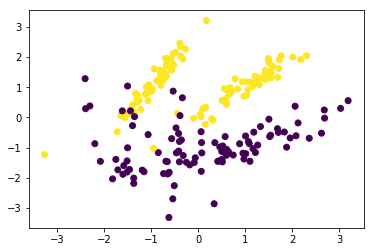

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [6]:
X.shape # Continious Values

(200, 2)

In [7]:
#training classifier
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
gnb.score(X,Y)

0.9

In [9]:
ypred = gnb.predict(X)
print(ypred)

[0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1
 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0
 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1
 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1]


In [10]:
print(Y)

[0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1
 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0
 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1
 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0
 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1]


In [11]:
acc = (np.sum(ypred==Y))/X.shape[0]

In [12]:
print(acc)

0.9


In [16]:
from sklearn.metrics import confusion_matrix

In [19]:
cnf_matrix = confusion_matrix(Y,ypred)
print(cnf_matrix)

[[87 11]
 [ 9 93]]


In [25]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[87 11]
 [ 9 93]]


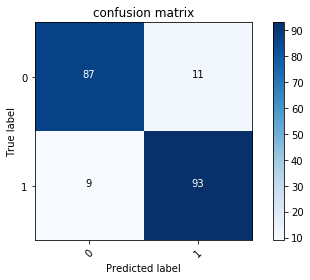

In [28]:
plot_confusion_matrix(cnf_matrix,[0,1],normalize=False,title="confusion matrix")